# Predicting Mild Cognitive Impairment (MCI) in Patients
The aim of this analysis is to predict whether a patient has Mild Cognitive Impairment (MCI) or not based on various demographic, health, and lifestyle factors.

The dataset used in this analysis contains information on patients, including their age, education level, cognitive test scores, gait measurements, and other relevant features. 

# Load the data set

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame where 0 represents non-MCI and 1 represents MCI
data = pd.read_csv("demo.csv")


# Exploratory Data Analysis

In [26]:
data.head()

,Unnamed: 0,level_0,subid,study,homeid,index,date_screen,cdrsum,cdrglob,age,...,bed_time,number_of_minutes,getting_up_time,hours_sleep_night,latency,h_sleep,n_room,study_num,study_dic,study_dic2
0,0,0,277,OLL,1118.0,NaN,2016-01-11,NaN,NaN,90.6,...,21:30,20.0,6:00,8.0,20.0,8.0,8.0,0.0,0.0,0.0
1,2,2,277,OLL,1118.0,NaN,2017-01-03,NaN,NaN,91.5,...,22:00,5.0,6:00,7.5,5.0,7.5,8.0,0.0,0.0,0.0
2,3,3,277,OLL,1118.0,NaN,2018-01-08,NaN,NaN,92.5,...,22:00,10.0,6:00,8.0,10.0,8.0,8.0,0.0,0.0,0.0
3,1,1,277,OLL,1118.0,NaN,2019-01-14,NaN,NaN,93.6,...,22:00,10.0,6:00,8.0,10.0,8.0,8.0,0.0,0.0,0.0
4,5,5,279,OLL,1175.0,NaN,2016-01-15,NaN,NaN,94.9,...,23:00,15.0,7:00,7.0,15.0,7.0,4.0,0.0,0.0,0.0


In [27]:
# Summary statistics
data.describe()

,Unnamed: 0,level_0,subid,homeid,index,cdrsum,cdrglob,age,gender,race,...,digbacls,mci,year,gait,latency,h_sleep,n_room,study_num,study_dic,study_dic2
count,501.000000,501.000000,501.000000,498.000000,131.000000,129.000000,131.000000,475.000000,475.000000,90.000000,...,114.000000,475.000000,477.000000,458.000000,359.000000,383.000000,496.000000,477.000000,477.000000,477.000000
mean,250.000000,250.000000,1359.169661,1374.475904,225.763359,0.244186,0.148855,81.481458,1.736842,1.600000,...,4.622807,0.153684,2017.737945,0.701334,25.456825,7.280026,5.782258,0.492662,0.109015,0.274633
std,144.770508,144.770508,523.230493,253.662953,164.242027,0.442455,0.229503,9.432617,0.440812,5.168617,...,1.177896,0.361026,1.057430,0.205102,27.799114,1.375058,2.135077,0.684806,0.311985,0.446798
min,0.000000,0.000000,277.000000,411.000000,0.000000,0.000000,0.000000,62.100000,1.000000,1.000000,...,2.000000,0.000000,2016.000000,0.110169,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,125.000000,125.000000,1055.000000,1171.000000,105.500000,0.000000,0.000000,74.200000,1.000000,1.000000,...,4.000000,0.000000,2017.000000,0.557561,10.000000,6.500000,4.000000,0.000000,0.000000,0.000000
50%,250.000000,250.000000,1444.000000,1296.000000,203.000000,0.000000,0.000000,80.900000,2.000000,1.000000,...,5.000000,0.000000,2018.000000,0.708837,15.000000,7.500000,5.000000,0.000000,0.000000,0.000000
75%,375.000000,375.000000,1736.000000,1540.000000,307.000000,0.500000,0.500000,89.400000,2.000000,1.000000,...,5.000000,0.000000,2019.000000,0.831273,30.000000,8.000000,7.000000,1.000000,0.000000,1.000000
max,500.000000,500.000000,2294.000000,1985.000000,574.000000,3.000000,0.500000,102.500000,2.000000,50.000000,...,8.000000,1.000000,2019.000000,1.287887,200.000000,11.000000,14.000000,2.000000,1.000000,1.000000


In [28]:
# Check for missing values
data.isna().sum()

## There are a lot of missing in values in majority of the columns as seen

Unnamed: 0                0
level_0                   0
subid                     0
study                     0
homeid                    3
index                   370
date_screen              76
cdrsum                  372
cdrglob                 370
age                      26
gender                   26
race                    411
educ                     67
gait_test_time           93
mmse                    173
mocatots                361
animals                 322
veg                     322
traila                  372
trailb                  372
boston                  489
exclude_iadl            365
exclude_adl              81
exclude_med             370
gad_7_total             372
adcomcirs_total          79
mobility_inside_home    370
gds_score               370
sleepap                 371
remdis                  371
hyposom                 371
sleepoth                371
crafturs                334
digforct                347
digforsl                384
digbacct            

In [29]:
# Drop rows without mci(target) value
data.dropna(subset=['mci'], inplace=True)

# Check distribution of dataset
print(data['mci'].value_counts())
print("We have Highly Imbalanced data")

0.0    402
1.0     73
Name: mci, dtype: int64
We have Highly Imbalanced data


Examined the structure of the dataset and identified missing values in several columns. 

Observed a highly imbalanced dataset, with a count of 402 non-MCI cases and 73 MCI cases.

In [30]:
# Print columns with more than 70% missing data
missing_percentage = (data.isnull().sum() / len(data)) * 100

columns_with_missing_data = missing_percentage[missing_percentage > 60].index

print("Columns with more than 60% missing data:")
for column in columns_with_missing_data:
    print(column)

Columns with more than 60% missing data:
index
cdrsum
cdrglob
race
mocatots
animals
veg
traila
trailb
boston
exclude_iadl
exclude_med
gad_7_total
mobility_inside_home
gds_score
sleepap
remdis
hyposom
sleepoth
crafturs
digforct
digforsl
digbacct
digbacls


Text(0.5, 1.0, 'Missing Values')

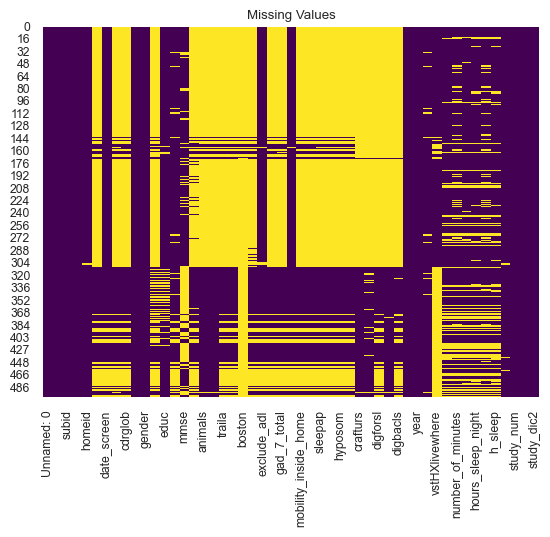

In [31]:
# Visualize missing values
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values')

Data Preprocessing:

1. Unnecessary columns with a high percentage of missing values(>70%) or no predictive value were dropped. 

2. Outliers in selected columns were visualized using box plots.

3. Duplicate columns like number_of_minutes = latency, h_sleep = hours_sleep_night, etc were dropped.

4. To handle missing values, we applied linear interpolation to certain columns and filled any remaining missing values using forward-fill and backward-fill methods. 

5. Categorical columns, dummy variables are created and original columns were dropped 

In [32]:
# Drop columns with more than 60% of missing values and unnecessary columns
data.drop(columns_with_missing_data,axis=1,inplace=True)

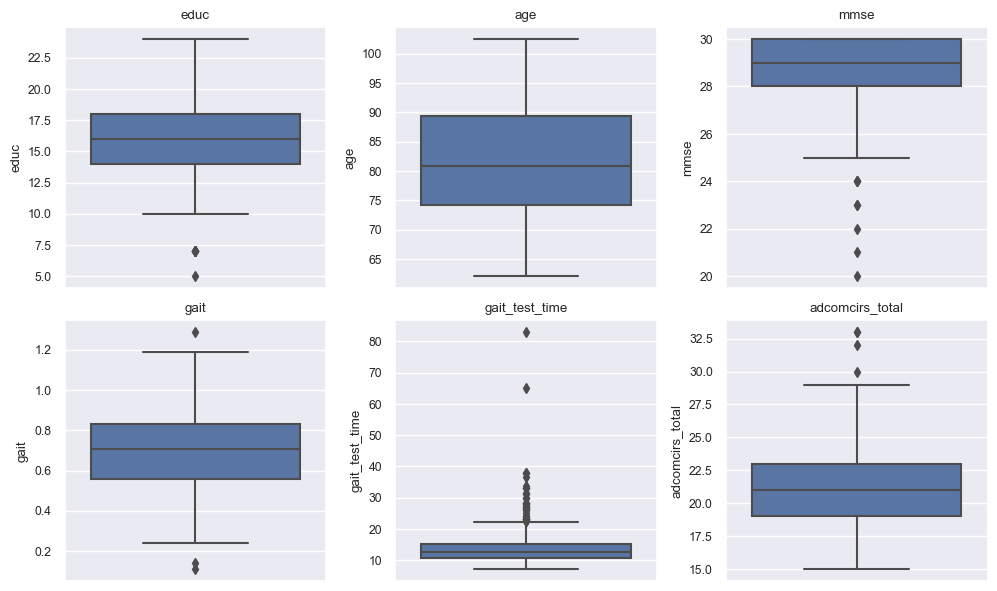

In [33]:
# Visualize outliers
cols_to_plot = ['educ', 'age', 'mmse', 'gait', 'gait_test_time','adcomcirs_total']

# Create a box plot
plt.figure(figsize=(10, 6))

# Iterate over each column and plot the box plot
for i, column in enumerate(cols_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=data, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

In [34]:
# Drop unnecessary columns 
data.drop(['Unnamed: 0','h_sleep','level_0',
          'subid','homeid', 'date_screen','year', 'bed_time','number_of_minutes','getting_up_time',
           'hours_sleep_night'],axis=1,inplace=True)

In [35]:
# Dropping temporarily - as functionally I do not see any information in there to predict MCI
data.drop(['study_num', 'study_dic', 'study_dic2'],axis=1, inplace=True)

In [36]:
# Check for nulls in the useful columns considered for analysis
data.isna().sum()

study                0
age                  0
gender               0
educ                41
gait_test_time      67
mmse               147
exclude_adl         55
adcomcirs_total     53
mci                  0
gait                17
vstHXlivewhere     181
latency            117
n_room               5
dtype: int64

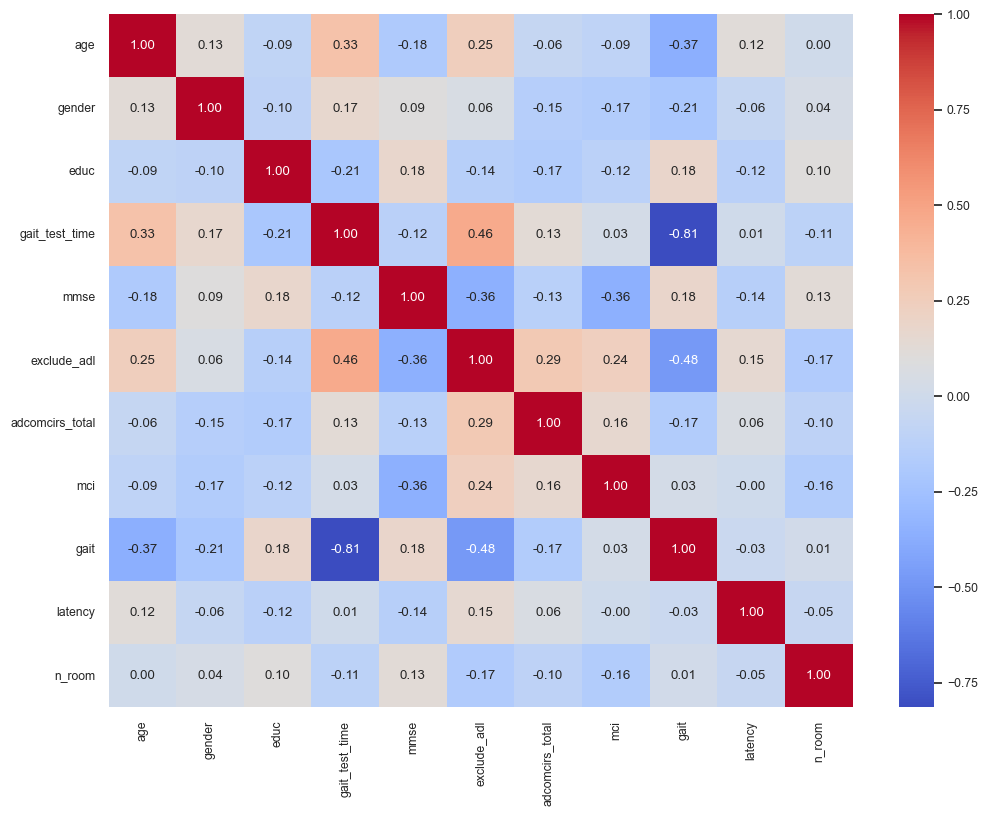

In [37]:
# Correlation plot
cor = data.corr()

sns.set(font_scale=0.8)
plt.figure(figsize=(12,9))
sns.heatmap(cor, annot=True, fmt=".2f", cmap="coolwarm")

plt.show()

In [38]:
data.dtypes

study               object
age                float64
gender             float64
educ               float64
gait_test_time     float64
mmse               float64
exclude_adl        float64
adcomcirs_total    float64
mci                float64
gait               float64
vstHXlivewhere      object
latency            float64
n_room             float64
dtype: object

# Data Preprocessing

In [39]:
# Utility functions
from sklearn.impute import KNNImputer

# Data cleaning function
def transform_df(df): 
    
    # Formatting datatypes
    df['educ'] = pd.to_numeric(df['educ'], errors='coerce')
    df['mmse'] = pd.to_numeric(df['mmse'], errors='coerce')
    
    #Imputing missing values
    col_impute = ['gait_test_time','exclude_adl','educ','vstHXlivewhere',
                       'adcomcirs_total','mmse','gait','latency','n_room']
    df[col_impute] = df[col_impute].interpolate(method='linear') 
    
    if df[col_impute].isnull().values.any():
        # forward fill to fill remaining missing values
        df[col_impute] = df[col_impute].fillna(method='ffill')
        df[col_impute] = df[col_impute].fillna(method='bfill')
    
    # Convert float columns to categorical variables
    df[['vstHXlivewhere', 'gender', 'study']] = df[['vstHXlivewhere', 'gender', 'study']].astype('category')

    # Create dummy variables
    dummy_variables = pd.get_dummies(df[['vstHXlivewhere', 'gender', 'study']])

    # Concatenate dummy variables with original dataframe
    df = pd.concat([df, dummy_variables], axis=1)

    # Drop original columns
    df.drop(['vstHXlivewhere', 'gender', 'study'], axis=1, inplace=True)
    
    
    return df

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('mci',axis=1), data['mci'],
                                                    test_size=0.2, random_state=123)

In [41]:
X_train = transform_df(X_train)
X_test = transform_df(X_test)

In [42]:
print(X_train.isna().sum())

age                          0
educ                         0
gait_test_time               0
mmse                         0
exclude_adl                  0
adcomcirs_total              0
gait                         0
latency                      0
n_room                       0
vstHXlivewhere_ASST LIVIN    0
vstHXlivewhere_HOME/APT      0
vstHXlivewhere_RETIRE COM    0
vstHXlivewhere_SINGLE FAM    0
gender_1.0                   0
gender_2.0                   0
study_OHSU_CART              0
study_OLL                    0
study_RUSH_CART              0
study_VA_CART                0
dtype: int64


In [43]:
print(X_test.isna().sum())

age                          0
educ                         0
gait_test_time               0
mmse                         0
exclude_adl                  0
adcomcirs_total              0
gait                         0
latency                      0
n_room                       0
vstHXlivewhere_ASST LIVIN    0
vstHXlivewhere_HOME/APT      0
vstHXlivewhere_RETIRE COM    0
vstHXlivewhere_SINGLE FAM    0
gender_1.0                   0
gender_2.0                   0
study_OHSU_CART              0
study_OLL                    0
study_RUSH_CART              0
study_VA_CART                0
dtype: int64


# Training Model
## 1. Decision Tree
## 2. SVM
## 3. Random Forest


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Initialize classifiers
decision_tree = DecisionTreeClassifier()
svm = SVC()
random_forest = RandomForestClassifier()

# Train the classifiers on the training data
decision_tree.fit(X_train, y_train)
svm.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
# Make predictions on the testing data
dt_pred = decision_tree.predict(X_test)
svm_pred = svm.predict(X_test)
rf_pred = random_forest.predict(X_test)

# Calculate accuracy
print("Decision tree accuracy:",accuracy_score(y_test, dt_pred))
print("SVM accuracy:", accuracy_score(y_test, svm_pred))
print("Random forest accuracy:", accuracy_score(y_test, rf_pred))

Decision tree accuracy: 0.8631578947368421
SVM accuracy: 0.8736842105263158
Random forest accuracy: 0.8947368421052632


# Optimizing Random Forest Classifier
Focused on optimizing the Random Forest classifier due to its better performance. 

GridSearchCV was employed to perform hyperparameter optimization using 5-fold cross-validation. The parameters considered for optimization included the number of estimators, maximum features, class weight, and maximum depth. 
The best parameters were obtained

The optimized Random Forest classifier was evaluated on the test set using the best parameters.

Other performance metrics, such as precision, recall, F1-score, ROC AUC, confusion matrix, and classification report, were also calculated to assess the model's performance in more detail.

In [46]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [47]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced'],
    'max_depth': [None, 5, 10]
}

# Create the Random Forest classifier
clf = RandomForestClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate the performance on the test set
test_score = grid_search.score(X_test, y_test)

print("Best parameters:", best_params)
print("Best score:", best_score)
print("Test score:", test_score)

Best parameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Best score: 0.85
Test score: 0.9157894736842105


In [48]:
from sklearn.metrics import roc_curve
print(classification_report(y_test, y_pred, target_names=['Non MCI', 'MCI']))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'y_pred' is not defined